In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import sklearn as sk

import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep') 
import matplotlib.style as style
style.use('fivethirtyeight')

In [2]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV

In [3]:
from sklearn.preprocessing import StandardScaler


In [4]:
#Regression
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor

#Metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [5]:
data = pd.read_csv('nyc-rolling-sales.csv')

In [6]:
data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [7]:
data['BOROUGH'][data['BOROUGH'] == 1] = 'Manhattan'
data['BOROUGH'][data['BOROUGH'] == 2] = 'Bronx'
data['BOROUGH'][data['BOROUGH'] == 3] = 'Brooklyn'
data['BOROUGH'][data['BOROUGH'] == 4] = 'Queens'
data['BOROUGH'][data['BOROUGH'] == 5] = 'Staten Island'

In [8]:
pd.set_option('display.max_columns',999)
data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


What we can see by looking at the first few rows is that the column Unnamed: 0 is an artifact from the data load and is not needed. The column EASEMENT is completely empty and will be deleted. And there some missing Sale Prices.

Update Data

I have already done some prior inspection of the data and am now updating the dataset by deleting columns and changing the data type of some of the variables.

In [9]:
#EASE_MEANT is empty and can be dropped
del data['EASE-MENT']

# Unnamed: 0 is an artifact from the data load and can be deleted
del data['Unnamed: 0']

In [10]:
#SALE PRICE is object but should be numeric
data['SALE PRICE'] = pd.to_numeric(data['SALE PRICE'], errors='coerce')

#LAND and GROSS SQUARE FEET is object but should be numeric
data['LAND SQUARE FEET'] = pd.to_numeric(data['LAND SQUARE FEET'], errors='coerce')
data['GROSS SQUARE FEET']= pd.to_numeric(data['GROSS SQUARE FEET'], errors='coerce')

#SALE DATE is object but should be datetime
data['SALE DATE'] = pd.to_datetime(data['SALE DATE'], errors='coerce')

#Both TAX CLASS attributes should be categorical
data['TAX CLASS AT TIME OF SALE'] = data['TAX CLASS AT TIME OF SALE'].astype('category')
data['TAX CLASS AT PRESENT'] = data['TAX CLASS AT PRESENT'].astype('category')

#### After updating the data let's check if there are any duplicate values in here.

In [11]:
sum(data.duplicated(data.columns))

765

In [12]:
#Delete the duplicates and check that it worked
data = data.drop_duplicates(data.columns, keep='last')
sum(data.duplicated(data.columns))

0

### High level data inspection and validation

In [13]:
# Check the number of rows and columns
data.shape

(83783, 20)

### Show visually how many null values are actually present

In [14]:
variables = data.columns

count = []

for variable in variables:
    length = data[variable].count()
    count.append(length)
    
count_pct = np.round(100 * pd.Series(count) / len(data), 2)

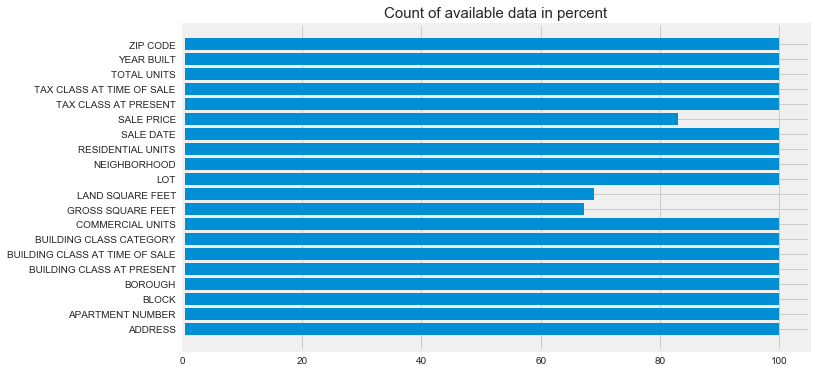

In [15]:
#Plot number of available data per variable
plt.figure(figsize=(10,6))
plt.barh(variables, count_pct)
plt.title('Count of available data in percent', fontsize=15)
plt.show()

### We can see that the sale price on which the prediction was supposed to be based is missing. Hence those observations will have to be deleted so that the model could be accurately predicted

In [16]:
# Remove observations with missing SALE PRICE
data = data[data['SALE PRICE'].notnull()]
len(data)

69607

### after removing the missing SALE PRICES we are left with 70k observations, down from 85k at the very start.

### Now, let's get an overview of some descriptive stats of the numerical variables in the data set.

In [17]:
data.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,69607.000000,69607.000000,69607.000000,69607.000000,69607.000000,69607.000000,4.844900e+04,4.790000e+04,69607.000000,6.960700e+04
mean,4199.890140,374.580473,10741.159323,1.875070,0.164121,2.059319,3.544802e+03,3.528707e+03,1799.852184,1.280703e+06
std,3431.897518,656.232024,1264.804508,14.291398,8.997236,16.992716,3.973875e+04,2.920564e+04,520.099311,1.143036e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1350.000000,22.000000,10306.000000,0.000000,0.000000,0.000000,1.425000e+03,8.160000e+02,1920.000000,2.300000e+05
50%,3378.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.150000e+03,1.620000e+03,1938.000000,5.330000e+05
75%,6192.000000,820.000000,11249.000000,2.000000,0.000000,2.000000,3.100000e+03,2.508000e+03,1965.000000,9.500000e+05
max,16319.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,2.210000e+09


### Some interesting observations to note:

#### 1) There are ZIP CODES with a value of 0, which is probably wrong.

#### 2) 75% of properties have no COMMERCIAL UNITS

#### 3) At least 50% of all properties have only 1 TOTAL UNIT. I am not quite sure what to make of that yet.

#### 4) There are properties have 0 SQUARE FEET, which shouldn't be possible unless they don't exist yet or the data is wrong.

#### 5) Some buildings were built in the YEAR 0, which again is wrong.

#### 6) Some properties have a SALE PRICE of 0, which is also wrong or a transfer but not actually a sale

### Dependent data inspection

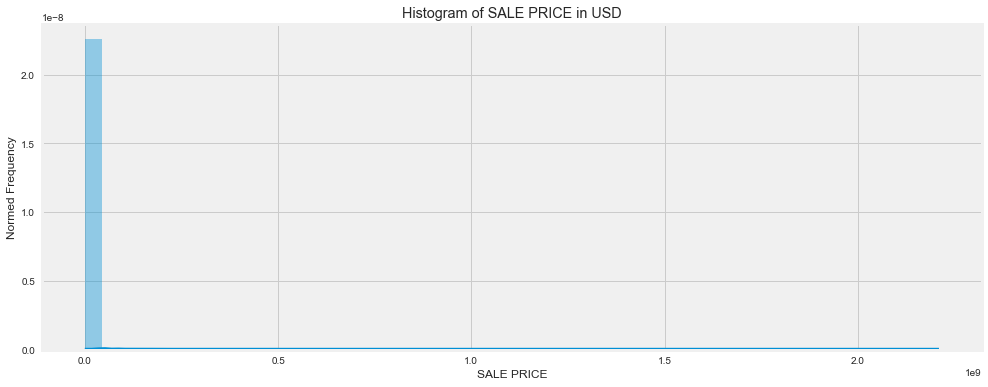

In [18]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.distplot(data['SALE PRICE'])
plt.title('Histogram of SALE PRICE in USD')
plt.ylabel('Normed Frequency')
plt.show()

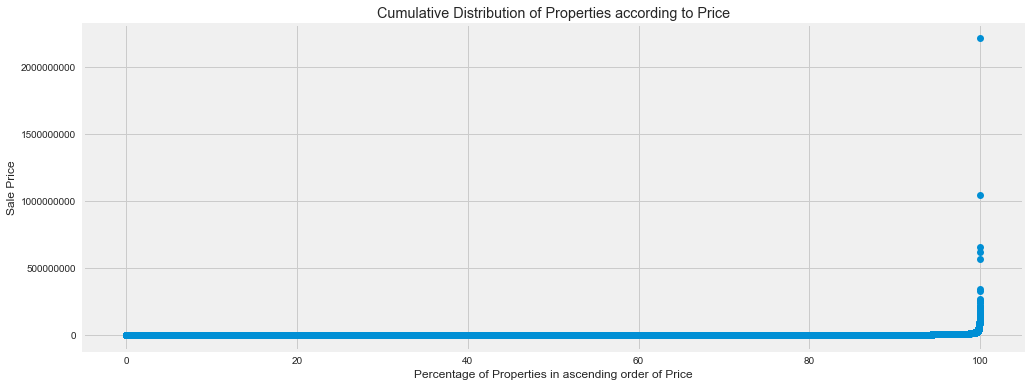

In [19]:
#Set the size of the plot
plt.figure(figsize=(15,6))

#Get the data and format it
x = data[['SALE PRICE']].sort_values(by='SALE PRICE').reset_index()
x['PROPERTY PROPORTION'] = 1
x['PROPERTY PROPORTION'] = x['PROPERTY PROPORTION'].cumsum()
x['PROPERTY PROPORTION'] = 100* x['PROPERTY PROPORTION'] / len(x['PROPERTY PROPORTION'])

# Plot the data and configure the settings
plt.plot(x['PROPERTY PROPORTION'],x['SALE PRICE'], linestyle='None', marker='o')
plt.title('Cumulative Distribution of Properties according to Price')
plt.xlabel('Percentage of Properties in ascending order of Price')
plt.ylabel('Sale Price')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### What we see from the two graphs above is that there are a lot of outliers. Maybe this isn't all that surprising given that Manhattan is home to a lot of very expensive property. From the descriptive statistics we could also tell that 75% of the properties in this dataset are cheaper than 950,000 USD. There are also a fair number of properties cheaper than 100,000 USD, which seems too cheap in my opinion.

#### I have done a few iterations of what a good cap on sales prices is and settled for

#### 1) property needs to be more expensive than 100,000 USD

#### 2) property needs to be cheaper than 5,000,000 USD

#### Everything is else is a different animal and mixing all together in one model will decrease accuracy.

In [20]:
# Remove observations that fall outside those caps
data = data[(data['SALE PRICE'] > 100000) & (data['SALE PRICE'] < 5000000)]
len(data)

54579

#### Now we're down to 55k observations which is still fair amount of data

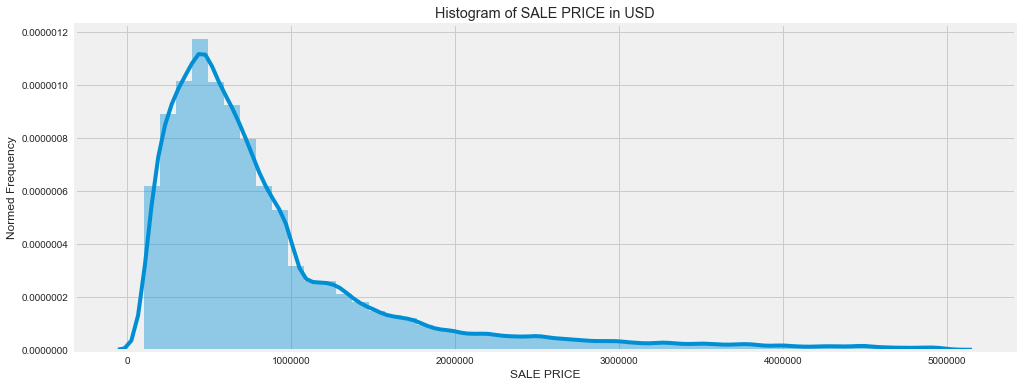

In [21]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.distplot(data['SALE PRICE'])
plt.title('Histogram of SALE PRICE in USD')
plt.ylabel('Normed Frequency')
plt.show()

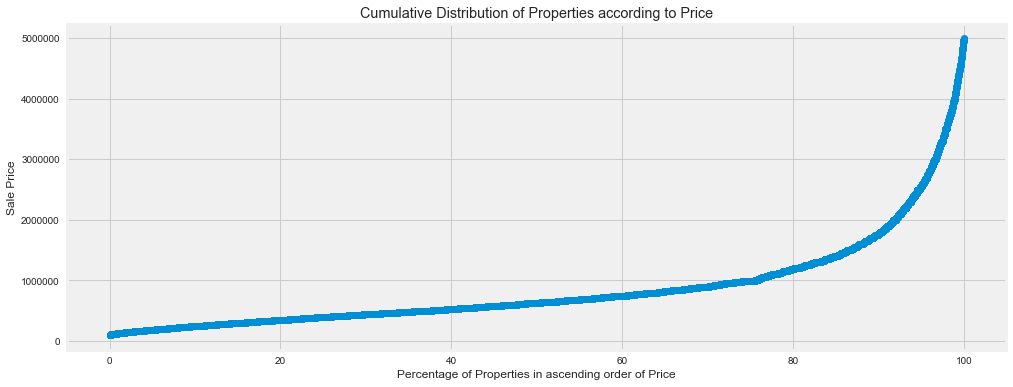

In [22]:
#Set the size of the plot
plt.figure(figsize=(15,6))

#Get the data and format it
x = data[['SALE PRICE']].sort_values(by='SALE PRICE').reset_index()
x['PROPERTY PROPORTION'] = 1
x['PROPERTY PROPORTION'] = x['PROPERTY PROPORTION'].cumsum()
x['PROPERTY PROPORTION'] = 100* x['PROPERTY PROPORTION'] / len(x['PROPERTY PROPORTION'])

# Plot the data and configure the settings
plt.plot(x['PROPERTY PROPORTION'],x['SALE PRICE'], linestyle='None', marker='o')
plt.title('Cumulative Distribution of Properties according to Price')
plt.xlabel('Percentage of Properties in ascending order of Price')
plt.ylabel('Sale Price')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [23]:
# Capture the necessary data
variables = data.columns

count = []

for variable in variables:
    length = data[variable].count()
    count.append(length)
    
count_pct = np.round(100 * pd.Series(count) / len(data), 2)

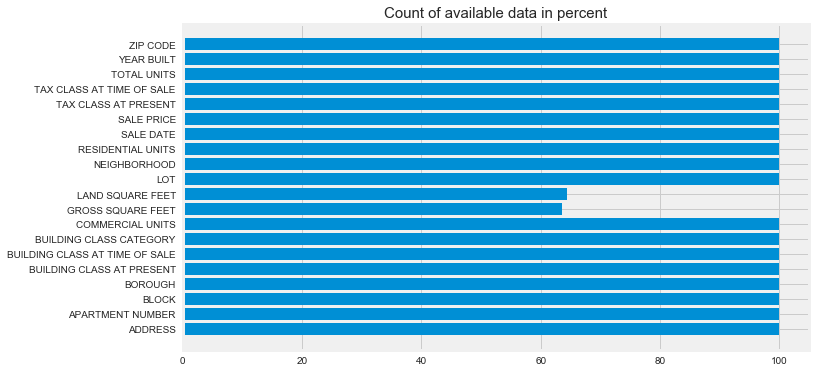

In [24]:
#Plot number of available data per variable
plt.figure(figsize=(10,6))
plt.barh(variables, count_pct)
plt.title('Count of available data in percent', fontsize=15)
plt.show()

### Independent variable inspection

### Square feet

In [25]:
# Removes all NULL values
data = data[data['LAND SQUARE FEET'].notnull()] 
data = data[data['GROSS SQUARE FEET'].notnull()]

In [26]:
# Keeps properties with fewer than 20,000 Square Feet, which is about 2,000 Square Metres
data = data[data['GROSS SQUARE FEET'] < 20000]
data = data[data['LAND SQUARE FEET'] < 20000]

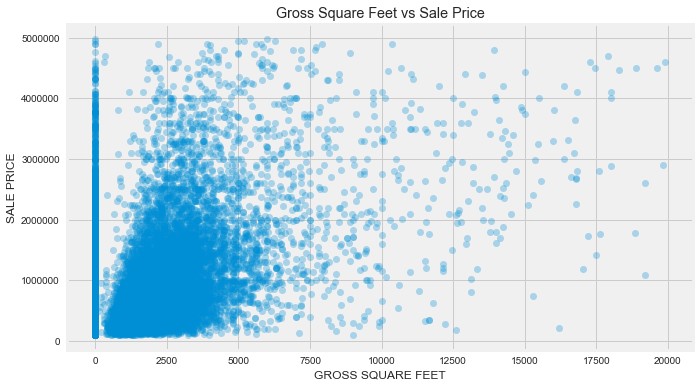

In [27]:
plt.figure(figsize=(10,6))
sns.regplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=data, fit_reg=False, scatter_kws={'alpha':0.3})
plt.title('Gross Square Feet vs Sale Price')
plt.show()

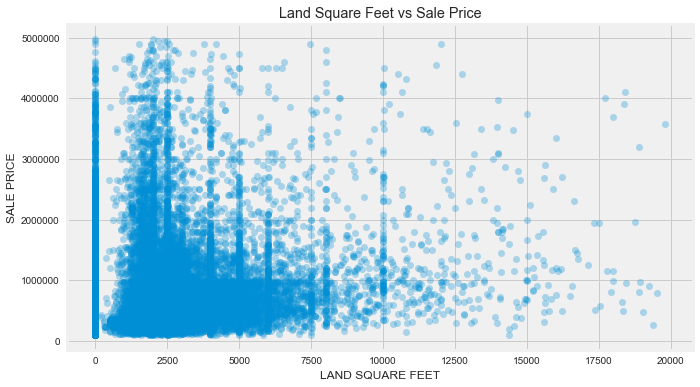

In [28]:
plt.figure(figsize=(10,6))
sns.regplot(x='LAND SQUARE FEET', y='SALE PRICE', data=data, fit_reg=False, scatter_kws={'alpha':0.3})
plt.title('Land Square Feet vs Sale Price')
plt.show()

In [29]:
# Only a handful of properties with 0 total units are remaining and they will now be deleted
data = data[(data['TOTAL UNITS'] > 0) & (data['TOTAL UNITS'] < 50)]

In [30]:
#Remove data where commercial + residential doesn't equal total units
data = data[data['TOTAL UNITS'] == data['COMMERCIAL UNITS'] + data['RESIDENTIAL UNITS']]

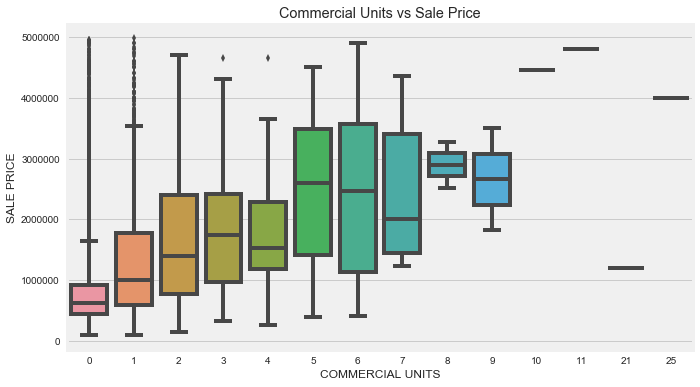

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(x='COMMERCIAL UNITS', y='SALE PRICE', data=data)
plt.title('Commercial Units vs Sale Price')
plt.show()

#### The boxplot above displays the number of sales price vs the commercial units and how the sales price is affected when there are a large number of commercial units in the building

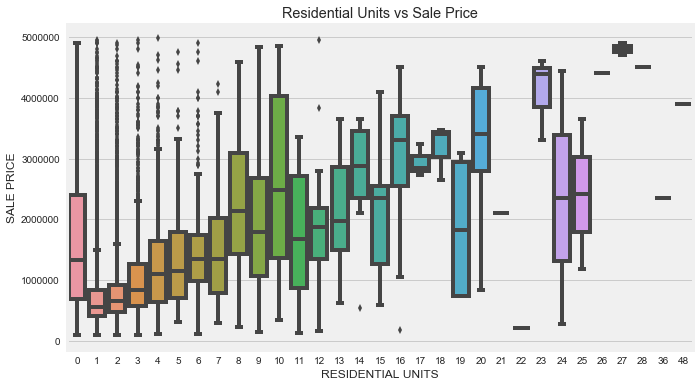

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(x='RESIDENTIAL UNITS', y='SALE PRICE', data=data)
plt.title('Residential Units vs Sale Price')
plt.show()

#### The above Boxplot represents the number of units the residential place has and its effects on the sale price. Eg: if a residential unit has 15 units, then it would range in the value of 1 million to 2.5 million.

### Year built

Next one up is YEAR BUILT. There seem to be some buildings that were built in the year 0, which can't be correct. Let's remove those.

In [33]:
data = data[data['YEAR BUILT'] > 0]

In [34]:
data['BUILDING AGE'] = 2017 - data['YEAR BUILT']

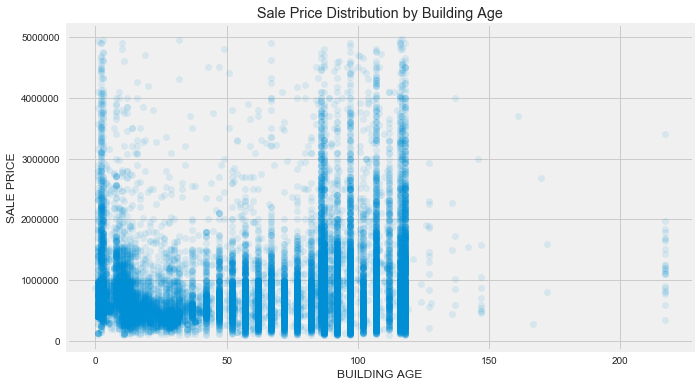

In [35]:
plt.figure(figsize=(10,6))
sns.regplot(x='BUILDING AGE', y='SALE PRICE', data=data, fit_reg=False, scatter_kws={'alpha':0.1})
plt.title('Sale Price Distribution by Building Age')
plt.show()

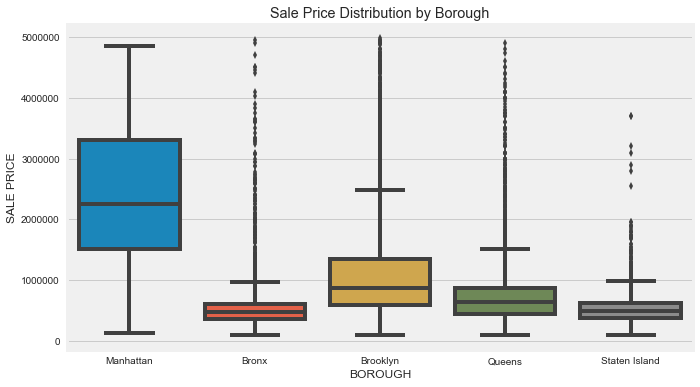

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(x='BOROUGH', y='SALE PRICE', data=data)
plt.title('Sale Price Distribution by Borough')
plt.show()

#### The Boxplot above displays the sales price of apartments in the borough giving an idea to the investors where they should invest in

### Building class category

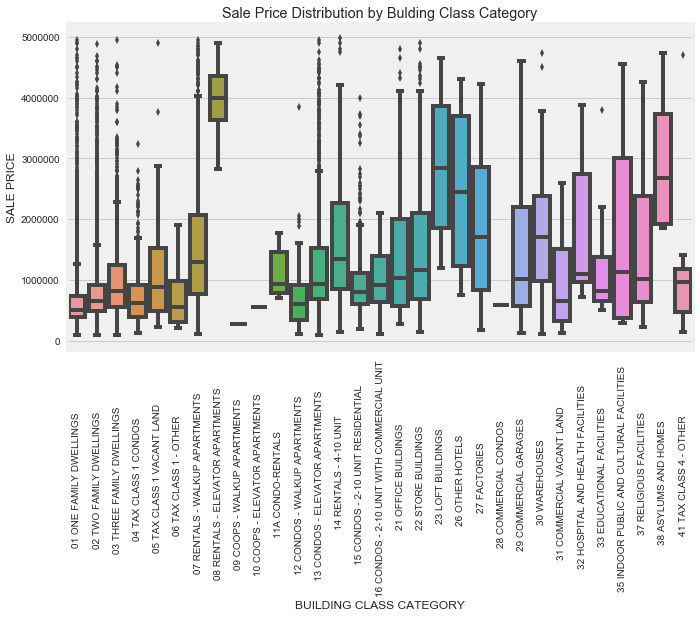

In [37]:
plt.figure(figsize=(10,6))
order = sorted(data['BUILDING CLASS CATEGORY'].unique())
sns.boxplot(x='BUILDING CLASS CATEGORY', y='SALE PRICE', data=data, order=order)
plt.xticks(rotation=90)
plt.title('Sale Price Distribution by Bulding Class Category')
plt.show()

## Data Modelling:

### Preparing the data:

In [38]:
#Choose only the variables I want to use in the model
columns = ['BOROUGH', 'BUILDING CLASS CATEGORY', 'COMMERCIAL UNITS','GROSS SQUARE FEET',
       'SALE PRICE', 'BUILDING AGE', 'LAND SQUARE FEET', 'RESIDENTIAL UNITS']
data_model = data.loc[:,columns]

In [39]:
#Select the variables to be one-hot encoded
one_hot_features = ['BOROUGH', 'BUILDING CLASS CATEGORY']

# For each categorical column, find the unique number of categories. This tells us how many columns we are adding to the dataset.
longest_str = max(one_hot_features, key=len)
total_num_unique_categorical = 0
for feature in one_hot_features:
    num_unique = len(data[feature].unique())
    print('{col:<{fill_col}} : {num:d} unique categorical values.'.format(col=feature, 
                                                                          fill_col=len(longest_str),
                                                                          num=num_unique))
    total_num_unique_categorical += num_unique
print('{total:d} columns will be added during one-hot encoding.'.format(total=total_num_unique_categorical))

BOROUGH                 : 5 unique categorical values.
BUILDING CLASS CATEGORY : 31 unique categorical values.
36 columns will be added during one-hot encoding.


In [40]:
# Convert categorical variables into dummy/indicator variables (i.e. one-hot encoding).
one_hot_encoded = pd.get_dummies(data_model[one_hot_features])
one_hot_encoded.info(verbose=True, memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29638 entries, 3 to 84545
Data columns (total 36 columns):
BOROUGH_Bronx                                                           29638 non-null uint8
BOROUGH_Brooklyn                                                        29638 non-null uint8
BOROUGH_Manhattan                                                       29638 non-null uint8
BOROUGH_Queens                                                          29638 non-null uint8
BOROUGH_Staten Island                                                   29638 non-null uint8
BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS                         29638 non-null uint8
BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS                         29638 non-null uint8
BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS                       29638 non-null uint8
BUILDING CLASS CATEGORY_04 TAX CLASS 1 CONDOS                           29638 non-null uint8
BUILDING CLASS CATEGORY_05 TAX CLASS 1 VACANT LAND    

In [41]:
#Delete the old columns...
data_model = data_model.drop(one_hot_features, axis=1)

#...and add the new one-hot encoded variables
data_model = pd.concat([data_model, one_hot_encoded], axis=1)
data_model.head()

,COMMERCIAL UNITS,GROSS SQUARE FEET,SALE PRICE,BUILDING AGE,LAND SQUARE FEET,RESIDENTIAL UNITS,BOROUGH_Bronx,BOROUGH_Brooklyn,BOROUGH_Manhattan,BOROUGH_Queens,BOROUGH_Staten Island,BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS,BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_04 TAX CLASS 1 CONDOS,BUILDING CLASS CATEGORY_05 TAX CLASS 1 VACANT LAND,BUILDING CLASS CATEGORY_06 TAX CLASS 1 - OTHER,BUILDING CLASS CATEGORY_07 RENTALS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_08 RENTALS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_09 COOPS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_10 COOPS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_11A CONDO-RENTALS,BUILDING CLASS CATEGORY_12 CONDOS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_13 CONDOS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_14 RENTALS - 4-10 UNIT,BUILDING CLASS CATEGORY_15 CONDOS - 2-10 UNIT RESIDENTIAL,BUILDING CLASS CATEGORY_16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT,BUILDING CLASS CATEGORY_21 OFFICE BUILDINGS,BUILDING CLASS CATEGORY_22 STORE BUILDINGS,BUILDING CLASS CATEGORY_23 LOFT BUILDINGS,BUILDING CLASS CATEGORY_26 OTHER HOTELS,BUILDING CLASS CATEGORY_27 FACTORIES,BUILDING CLASS CATEGORY_28 COMMERCIAL CONDOS,BUILDING CLASS CATEGORY_29 COMMERCIAL GARAGES,BUILDING CLASS CATEGORY_30 WAREHOUSES,BUILDING CLASS CATEGORY_31 COMMERCIAL VACANT LAND,BUILDING CLASS CATEGORY_32 HOSPITAL AND HEALTH FACILITIES,BUILDING CLASS CATEGORY_33 EDUCATIONAL FACILITIES,BUILDING CLASS CATEGORY_35 INDOOR PUBLIC AND CULTURAL FACILITIES,BUILDING CLASS CATEGORY_37 RELIGIOUS FACILITIES,BUILDING CLASS CATEGORY_38 ASYLUMS AND HOMES,BUILDING CLASS CATEGORY_41 TAX CLASS 4 - OTHER
3,0,6794.0,3936272.0,104,2272.0,10,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,4226.0,3192840.0,97,1750.0,8,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
172,1,3360.0,3300000.0,107,1520.0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
174,1,3713.0,4750000.0,107,1779.0,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
195,1,3586.0,3700000.0,118,1218.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### Tansforming Sale price data to bring it to normalize form

In [42]:
# Take the log and normalise
data_model['SALE PRICE'] = StandardScaler().fit_transform(np.log(data_model['SALE PRICE']).reshape(-1,1))

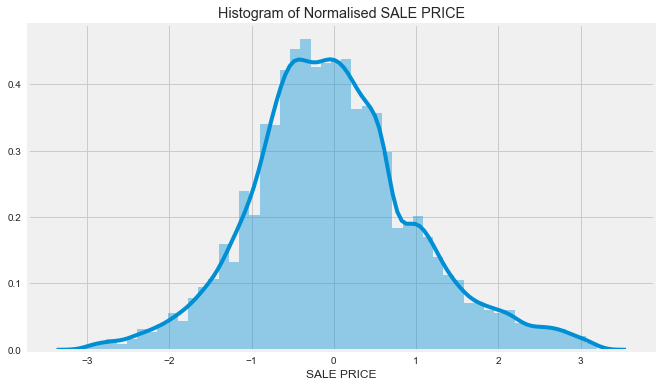

In [43]:
plt.figure(figsize=(10,6))
sns.distplot(data_model['SALE PRICE'])
plt.title('Histogram of Normalised SALE PRICE')
plt.show()

### Now normalizing the independent variables 
#### Units, Square feet and building age

In [44]:
# Add 1 to Units
data_model['COMMERCIAL UNITS'] = data_model['COMMERCIAL UNITS'] + 1
data_model['RESIDENTIAL UNITS'] = data_model['RESIDENTIAL UNITS'] + 1

# Take the log and standardise
data_model['COMMERCIAL UNITS'] = StandardScaler().fit_transform(np.log(data_model['COMMERCIAL UNITS']).reshape(-1,1))
data_model['RESIDENTIAL UNITS'] = StandardScaler().fit_transform(np.log(data_model['RESIDENTIAL UNITS']).reshape(-1,1))

# Add 1 to Units
data_model['GROSS SQUARE FEET'] = data_model['GROSS SQUARE FEET'] + 1
data_model['LAND SQUARE FEET'] = data_model['LAND SQUARE FEET'] + 1

# Take the log and standardise
data_model['GROSS SQUARE FEET'] = StandardScaler().fit_transform(np.log(data_model['GROSS SQUARE FEET']).reshape(-1,1))
data_model['LAND SQUARE FEET'] = StandardScaler().fit_transform(np.log(data_model['LAND SQUARE FEET']).reshape(-1,1))

# Add 1 to BUILDING AGE
data_model['BUILDING AGE'] = data_model['BUILDING AGE'] + 1

# Take the log and standardise
data_model['BUILDING AGE'] = StandardScaler().fit_transform(np.log(data_model['BUILDING AGE']).reshape(-1,1))

### Splitting the data into train and test

In [45]:
#Split data into training and testing set with 80% of the data going into training
training, testing = train_test_split(data_model, test_size=0.2, random_state=0)
print("Total sample size = %i; training sample size = %i, testing sample size = %i"\
     %(data_model.shape[0],training.shape[0],testing.shape[0]))

Total sample size = 29638; training sample size = 23710, testing sample size = 5928


In [46]:
#X are the variables/features that help predict y, which tells us whether an employee left or stayed. This is done for both 
#training and testing
df_train_s = training.loc[:,data_model.columns]
X_train_s = df_train_s.drop(['SALE PRICE'], axis=1)
y_train_s = df_train_s.loc[:, ['SALE PRICE']]

df_test_s = testing.loc[:,data_model.columns]
X_test_s = df_test_s.drop(['SALE PRICE'], axis=1)
y_test_s = df_test_s.loc[:, ['SALE PRICE']]

## Linear Regression:

In [47]:
# Create the regressor: linreg
linreg = LinearRegression()

# Fit the regressor to the training data
linreg.fit(X_train_s, y_train_s)

# Predict the labels of the test set: y_pred
y_pred_s = linreg.predict(X_test_s)

# Compute 5-fold cross-validation scores: cv_scores
cv_scores_linreg = cross_val_score(linreg, X_train_s, y_train_s, cv=5)

In [48]:
print("R^2: {}".format(linreg.score(X_test_s, y_test_s)))
rmse = np.sqrt(mean_squared_error(y_test_s, y_pred_s))
print("Root Mean Squared Error: {}".format(rmse))

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_linreg)))
# Print the 5-fold cross-validation scores
print(cv_scores_linreg)

R^2: -4.6504132749548696e+20
Root Mean Squared Error: 21859984991.31771
Average 5-Fold CV Score: 0.35215807281623296
[0.3539045  0.36669194 0.34626091 0.35177117 0.34216184]


## Random Forest:

In [49]:
rf_reg = RandomForestRegressor()

rf_reg.fit(X_train_s, y_train_s)

y_pred_s_rf = rf_reg.predict(X_test_s)

# Compute 5-fold cross-validation scores: cv_scores
cv_scores_rf = cross_val_score(rf_reg, X_train_s, y_train_s, cv=5)

In [50]:
print("R^2: {}".format(rf_reg.score(X_test_s, y_test_s)))
rmse = np.sqrt(mean_squared_error(y_test_s, y_pred_s_rf))
print("Root Mean Squared Error: {}".format(rmse))

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_rf)))
# Print the 5-fold cross-validation scores
print(cv_scores_rf)

R^2: 0.3951269761611014
Root Mean Squared Error: 0.7883810789566087
Average 5-Fold CV Score: 0.3792024105288728
[0.37541268 0.42223792 0.36073194 0.37030039 0.36732913]


## Conclusion:

#### We started with a large amount of data which needed a lot of EDA to bring it in a form where the model predicts the actual sales price. EDA is done so that data can be visualized and we can obtain good knowledge of what the data is representing and what features can be used to predict a higher accuracy of the sales prices.
#### We used two models from which we can come to a conclusion that RandomForest works best for the data provided.
#### SQUARE FEET, BUILDING AGE, and BOROUGH were the most important features determining the SALE PRICE. We only used 30k observations out of a potential of 70k. Since there were a fair amount of NULL SALE PRICE observations and duplicates etc. So the original 85k don't count.
#### Linear regression tends to draw a line keeping in mind all the data points and hence overfitting the model which brings the error to a higher value. Randomforest on the other hand uses ensembeled outputs of many decision trees which bring an almost accurate results